<a href="https://colab.research.google.com/github/Saphall/Intern-Suven-Consultant/blob/main/Recognizing_Handwritten_Digits_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [158]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm 

Importing dataset form scikitlearn datasets

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

Lets read datatest description

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Images of handwritten digits are contained in (digits.images) array. Each element of this array is represented by 8x8 matrix of numeric values.

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualize the digit with matplotlib

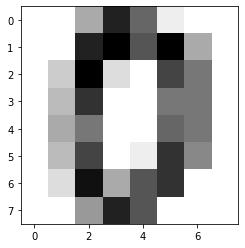

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[0],cmap=plt.cm.gray_r,interpolation = 'nearest');

Target values of all these images

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.target.size

1797

# **Condition 1:**
* Select first 1791 elements as training set and **last 6 digits as testing set.**

Lets separate the training sets

In [8]:
X_train = digits.data[1:1790]
y_train = digits.target[1:1790]


Let's see the testing set from index 1791 to 1797.

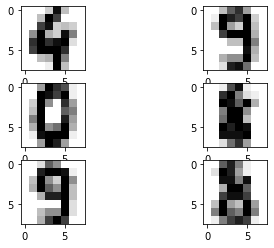

In [9]:
#visulaize validation set
import matplotlib.pyplot as plt
%matplotlib inline
no=1791
for i in range(321,327):
  plt.subplot(i)
  plt.imshow(digits.images[no],cmap=plt.cm.gray_r,
             interpolation='nearest')
  no+=1


**Choose Our Model:**

**(Support Vector Machines(svm))**

In [10]:
model = svm.SVC(gamma = 0.001 , C =100.)

Let's fit in ourmodel

In [11]:
model.fit(X_train,y_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Let's predict in our validation set

In [12]:
model.predict(digits.data[1791:1796])

array([4, 9, 0, 8, 9])

In [13]:
digits.target[1791:1796]

array([4, 9, 0, 8, 9])

In [14]:
print(f"Model accuracy:{model.score(digits.data[1791:1796],digits.target[1791:1796])*100:.2f}%")

Model accuracy:100.00%


It predicted all the validation set correctly.

**Well 100% accuracy is a great thing. But let's check how our model does with different number of training and testing data.**

# **Condition 2:**
* Lets separate data-set with **80% of training data** and  **20 % of testing data.**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

**Our Model:**

**(Support Vector Machines(svm))**

In [17]:
from sklearn import svm
model = svm.SVC(gamma=0.001,C=100.)

In [18]:
# Fiting the model
model.fit(X_train,y_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
# predicted values
model.predict(X_test)

array([3, 3, 2, 8, 9, 5, 3, 5, 9, 0, 3, 4, 8, 4, 0, 8, 6, 2, 3, 4, 8, 0,
       3, 9, 6, 4, 9, 0, 9, 1, 3, 6, 9, 1, 5, 2, 3, 6, 1, 2, 2, 3, 4, 3,
       2, 8, 7, 1, 4, 7, 9, 5, 9, 6, 6, 2, 9, 5, 2, 7, 2, 3, 7, 8, 0, 7,
       5, 3, 2, 5, 0, 2, 9, 4, 4, 4, 0, 3, 0, 5, 5, 4, 6, 2, 1, 9, 4, 1,
       6, 2, 9, 2, 3, 7, 1, 6, 4, 0, 4, 5, 5, 4, 4, 2, 6, 1, 5, 8, 8, 0,
       6, 6, 2, 2, 4, 8, 1, 9, 8, 4, 5, 1, 4, 2, 0, 7, 2, 3, 7, 0, 8, 9,
       6, 7, 8, 3, 8, 6, 0, 5, 5, 6, 6, 4, 1, 3, 5, 6, 8, 5, 7, 2, 8, 5,
       9, 8, 4, 7, 7, 6, 4, 9, 5, 0, 6, 7, 4, 8, 7, 1, 1, 3, 9, 1, 1, 8,
       8, 0, 0, 8, 2, 6, 3, 3, 8, 9, 2, 9, 6, 9, 3, 7, 5, 8, 9, 1, 8, 8,
       8, 6, 1, 9, 4, 1, 8, 5, 2, 3, 5, 8, 0, 4, 9, 6, 0, 2, 2, 3, 0, 6,
       2, 0, 2, 7, 4, 7, 7, 9, 7, 8, 0, 7, 1, 9, 6, 8, 8, 7, 6, 6, 1, 6,
       1, 3, 2, 6, 6, 0, 1, 4, 5, 3, 7, 9, 3, 0, 2, 7, 8, 4, 0, 2, 4, 5,
       4, 3, 5, 1, 7, 5, 0, 3, 3, 4, 7, 3, 0, 7, 5, 8, 0, 3, 0, 2, 8, 4,
       2, 8, 4, 7, 6, 2, 8, 5, 9, 5, 9, 6, 9, 8, 8,

In [20]:
# Actual values
y_test

array([3, 3, 2, 8, 9, 5, 3, 5, 9, 0, 3, 4, 8, 4, 0, 8, 6, 2, 3, 4, 8, 0,
       3, 9, 6, 4, 9, 0, 9, 1, 3, 6, 9, 1, 5, 2, 3, 6, 1, 2, 2, 3, 4, 3,
       2, 8, 7, 1, 4, 7, 9, 5, 9, 6, 6, 2, 9, 5, 2, 7, 2, 3, 7, 8, 0, 7,
       5, 3, 2, 5, 0, 2, 9, 4, 4, 4, 0, 3, 0, 5, 5, 4, 6, 2, 1, 9, 4, 1,
       6, 2, 9, 2, 3, 7, 1, 6, 4, 0, 4, 9, 5, 4, 4, 2, 6, 1, 5, 8, 8, 0,
       6, 6, 2, 2, 4, 8, 1, 9, 8, 4, 5, 1, 4, 2, 0, 7, 2, 3, 7, 0, 8, 9,
       6, 7, 8, 3, 8, 6, 0, 5, 5, 6, 6, 4, 1, 3, 5, 6, 8, 5, 7, 2, 8, 5,
       9, 8, 4, 7, 7, 6, 4, 9, 5, 0, 6, 7, 4, 8, 7, 1, 1, 3, 9, 1, 1, 8,
       8, 0, 0, 8, 2, 6, 3, 3, 8, 3, 2, 9, 6, 9, 3, 7, 5, 8, 9, 1, 8, 8,
       8, 6, 1, 9, 4, 1, 8, 5, 2, 3, 5, 8, 0, 4, 9, 6, 0, 2, 2, 3, 0, 6,
       2, 0, 2, 7, 4, 7, 7, 9, 7, 8, 0, 7, 1, 9, 6, 8, 8, 7, 6, 6, 1, 6,
       1, 3, 2, 6, 6, 0, 1, 4, 9, 3, 7, 9, 3, 0, 2, 7, 8, 4, 0, 2, 4, 5,
       4, 3, 5, 1, 7, 5, 0, 3, 3, 4, 7, 3, 0, 7, 5, 8, 0, 3, 0, 2, 8, 4,
       2, 8, 4, 7, 6, 2, 8, 5, 9, 5, 9, 6, 9, 8, 8,

In [21]:
print(f"Model accuracy: {model.score(X_test,y_test) * 100:.2f}%")

Model accuracy: 98.61%


Here, the accuracy of our model decreased from 100% to 98.61% after we gave 80% data as training data and 20% data as testing data.

**Clearly, this shows we cannot train our model with large amount of training datas. This can result in overfitting.**

Let's furthur analyze our model from **cross validation:**

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
cross_val_score(model,X_test,y_test,cv=5)


array([0.98611111, 1.        , 0.98611111, 0.98611111, 0.97222222])

In [24]:
print(f'Average accuracy obtained from our model: {np.mean(cross_val_score(model,X_test,y_test,cv=5))*100:.2f}%')

Average accuracy obtained from our model: 98.61%


**This concludes our model is 98.61 % accurate in general  and not 100% accurate as condition 1!** 

# **Condition 3:**
* Lets further separate our data-set with **30% of training data** and  **70 % of testing data.**

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.7)

**Our Model:**

**(Support Vector Machines(svm))**

In [126]:
from sklearn import svm
model = svm.SVC(gamma=0.001,C=100.,random_state=100)

In [127]:
# Fiting the model
model.fit(X_train,y_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=100, shrinking=True, tol=0.001,
    verbose=False)

In [128]:
# predicted values
model.predict(X_test)

array([3, 1, 3, ..., 9, 5, 7])

In [157]:
# Actual values
y_test

array([3, 1, 3, ..., 9, 5, 7])

In [130]:
print(f"Model accuracy: {model.score(X_test,y_test) * 100:.2f}%")

Model accuracy: 98.09%


**Well it seems our model is doing exceptionally well even the training data is only 30% ! This is because we have very small dataset!**

**The separtion of 30% dataset as training data and 70% data as testing data is not a practical way,however, the accuracy seems preety good here but this is because we have very less data-set.**

We should further analyze our model with training data, validation data and testing data.A data scientist divides up all the datasets into three subsets: the training set, the validation set, and the test set. Common ratios used are:

* 70% train, 15% val, 15% test
* 80% train, 10% val, 10% test
* 60% train, 20% val, 20% test